In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
df = pd.read_csv("/content/House Price Prediction Dataset.csv")
print(df.head())
# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing values
df = df.dropna(subset=['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
                       'Location', 'Condition', 'Garage', 'Price'])

# One-hot encode 'Location'
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Encode 'Condition' and 'Garage'
df['Condition'] = df['Condition'].map({'Fair': 0, 'Good': 1, 'Excellent': 2})
df['Garage'] = df['Garage'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [ ]:
# Convert X_scaled back to DataFrame to check for NaNs
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine X and y temporarily to drop any rows with NaNs
final_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
final_df = final_df.dropna()

# Separate features and target again
X_clean = final_df.drop(columns=['Price'])
y_clean = final_df['Price']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)



GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 237415.30
RMSE: 279721.23


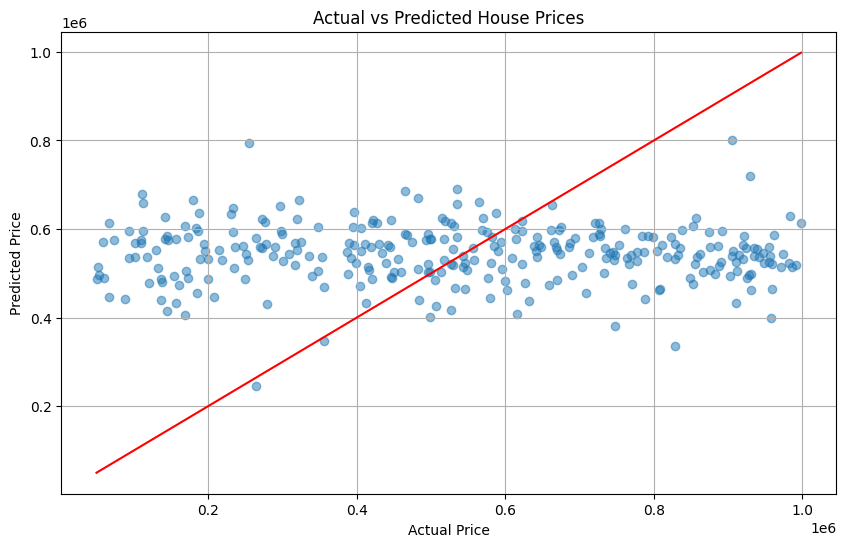

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
